# Retroalimentación Segundo Parcial (2018-I)
<hr/>

# Primer Punto (Interpolación)
#### En la siguiente Tabla se muestra la producción mundial total de petróleo en millones de barriles diarios. 

| año  | barriles/día (millones) |   |   |   |
|------|-------------------------|---|---|---|
| 1994 | 67052                   |   |   |   |
| 1995 | 68008                   |   |   |   |
| 1996 | 69803                   |   |   |   |
| 1997 | 72024                   |   |   |   |
| 1998 | 73400                   |   |   |   |
| 1999 | 72063                   |   |   |   |
| 2000 | 74669                   |   |   |   |
| 2001 | 74487                   |   |   |   |
| 2002 | 74065                   |   |   |   |
| 2003 | 76777                   |   |   |   |

* Calcule el polinomio de interpolacion de Lagrange 
* Calcule el polinomio de interpolacion de Newton
* Use los polinomios encontrados para predecir la producción total de petróleo para el año 2010.¿Tiene sentido su resultado?
* Grafique ambos polinomios en una misma ventana junto con los datos de la tabla.
* Según los resultados en los pasos anteriores decida si los métodos de interpolación son adecuados para realizar predicciones en este caso particular.

In [1]:
# Solucion primer punto
datos = [[1994,67052],[1995,68008],[1996,69803],[1997,72024],\
         [1998,73400],[1999,72063],[2000,74669],[2001,74487],\
         [2002,74065],[2003,76777]]

In [2]:
def LagrangePol(datos):
    # la funcion LagrangePol crea un objeto que evalua un polinomio
    # en un cierto valor de x
    def L(k, x):  # pol $L_k(x)=\prod\limits_{i \neq k}\frac{x-x_i}{x_k-x_i}$
        out = 1.0
        for i, p in enumerate(datos):
            if i != k:
                out *= (x-p[0])/(datos[k][0]-p[0])
        return out

    def P(x):  # polinomio $P(x)=\sum\limits_{k}f(x_k)L_k(x)$
        lag = 0.0
        for k, p in enumerate(datos):
            lag += p[1]*L(k, x)
        return lag

    return P

def NewtonPol(dat):
    # la funcion NewtonPol crea un objeto que evalua un polinomio en un cierto valor de x
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):  # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1.0
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x-p[0])
        return out

    def P(x):  # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0.0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P

In [3]:
pol_lag = LagrangePol(datos)
table, pol_newt = NewtonPol(datos)

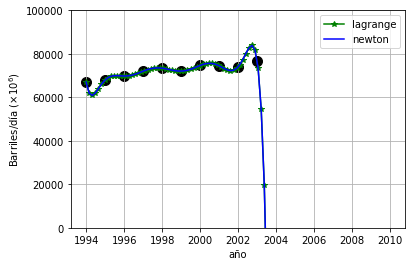

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
xx = np.linspace(1994,2010,100)
yy = pol_lag(xx)
yy2 = pol_newt(xx)
for p in datos:
    plt.scatter(p[0],p[1],c='k',s=100)
plt.plot(xx,yy,'*-g',label='lagrange')
plt.plot(xx,yy2,'b', label='newton')
plt.ylim([0,100000])
plt.xlabel('año')
plt.ylabel(r'Barriles/día ($\times 10^6$)')
plt.grid(True)
plt.legend()

#### R/ En este caso los polinomios interpoladores no son modelos adecuados para los datos en estudio pues dan predicciones que contradicen la lógica de las variables estudiadas.

# Segundo Punto (Regresión Lineal)
#### Una empresa está probando en el mercado un nuevo refresco en 22 ciudades de población aproximadamente igual. El precio de venta (en dólares) y el número de refrescos vendidos por semana en las ciudades son los siguientes:
|precio| ventas/semana |   |   |   |
|------|---------------|---|---|---|
| 0.59 | 3980          |   |   |   |
| 0.80 | 2200          |   |   |   |
| 0.95 | 1850          |   |   |   |
| 0.45 | 6100          |   |   |   |
| 0.79 | 2100          |   |   |   |
| 0.99 | 1700          |   |   |   |
| 0.90 | 2000          |   |   |   |
| 0.65 | 4200          |   |   |   |
| 0.79 | 2440          |   |   |   |
| 0.69 | 3300          |   |   |   |

* Usando mínimos cuadrados con los datos de la tabla, determine la curva de demanda que relaciona el número de ventas por semana $S$ en función del precio por unidad $P$ usando un modelo lineal:

\begin{equation}
S(P) = a_0 + a_1 P
\end{equation}

* Calcule el coeficiente de correlacion asociado.
* Grafique el modelo lineal obtenido junto con los datos de la tabla.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def totales(datos):
    [X,Y,XX,YY,XY] = [0.0,0.0,0.0,0.0,0.0]
    for p in datos:
        X += p[0]
        Y += p[1]
        XX += pow(p[0],2.0)
        YY += pow(p[1],2.0)
        XY += p[0]*p[1]
    return [X,Y,XX,YY,XY]

def mincua_linear(datos,**args):
    [X,Y,XX,YY,XY] = totales(datos)
    m = len(datos)
    
    def linear(x):
        a0 = (Y*XX-X*XY)/(m*XX-X*X)
        a1 = (m*XY-X*Y)/(m*XX-X*X)
        return a0+a1*x 
    return linear

## funcion que calcula el coeficiente de correlación
def R2(datos):
    import math as mt
    [X,Y,XX,YY,XY] = totales(datos)
    m = len(datos)
    return (m*XY-X*Y)/(mt.sqrt((m*XX-X*X)*(m*YY-Y*Y)))

In [6]:
datos = [[0.59,3980],[0.80,2200],[0.95,1850],[0.45,6100],[0.79,2100],\
         [0.99,1700],[0.90,2000],[0.65,4200],[0.79,2440],[0.69,3300]]

In [7]:
model = mincua_linear(datos)
r2 = R2(datos)
print(r2)

-0.9451491030171313


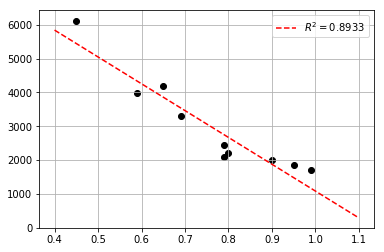

In [12]:
xx = np.linspace(0.4,1.1,100)
yy = model(xx)
for p in datos:
    plt.scatter(p[0],p[1],c='k')
plt.plot(xx,yy,'--r',label=r'$R^2 = $'+str(round(pow(r2,2),4)))
plt.grid(True)
plt.legend()